In [28]:
# k-means is a clustering algorithm. It starts by placing k centroids 
# it labels instances of data and updates the centroid
# this process continues until the centroids stop moving
# two types of clustering: 
# 1) hard clustering - each instance assigned a cluster
# 2) soft clustering - each instance gets a score per cluster

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [15]:
# create and plot some example data

In [8]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [12]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

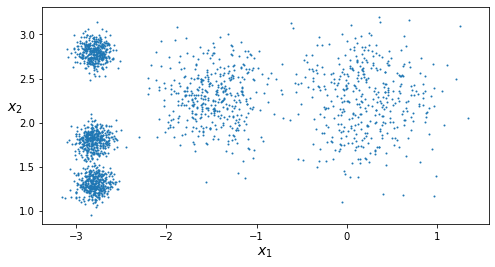

In [14]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [17]:
# create a k-means clustering algo

In [19]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [21]:
# each instance label is the index of the cluster it is assigned to
y_pred

array([0, 4, 1, ..., 3, 1, 4])

In [22]:
y_pred is kmeans.labels_

True

In [23]:
# the 5 centroids are...
kmeans.cluster_centers_

array([[-2.80050691,  1.30147187],
       [ 0.20667809,  2.25769931],
       [-1.46893704,  2.28372774],
       [-2.79290307,  2.79641063],
       [-2.80377445,  1.80178155]])

In [29]:
# can make predictions on where a new instance would be (hard clustering)
X_new = np.array([[0,2], [3, 2], [-3, 3], [-3, 1.5]])
kmeans.predict(X_new)

array([1, 1, 3, 0])

In [32]:
# or do a soft clustering approach - i.e. each instance gets a distance score compared to each centroid
kmeans.transform(X_new)

array([[2.88630915, 0.33034038, 1.49608739, 2.9042344 , 2.81077244],
       [5.84241576, 2.80518382, 4.47793476, 5.84739223, 5.80715838],
       [1.7102033 , 3.29147303, 1.69032533, 0.29040966, 1.21417952],
       [0.28144433, 3.29497991, 1.71999504, 1.31284792, 0.35996746]])

In [33]:
# k-means previously initiated centroids randomly
# you can initiate using selected values if you have an idea of what centroids should be

In [35]:
good_init = np.array([[-3, 3], [-3, 1.75], [-3, 1.25], [-1.5, 2.5], [0, 2.5]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [37]:
y_pred = kmeans.fit_predict(X)

In [38]:
kmeans.cluster_centers_

array([[-2.7943747 ,  2.79740645],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.47077903,  2.28400646],
       [ 0.20667809,  2.25769931]])

In [41]:
# can run this multiple times and keep the best solution by changing the n_init hyperparameter
# best solution determined by the models inertia (kmeans.inertia_)
# - mean square distance between each instance and its closest centroid

In [43]:
# can also use mini-batches to speed up algorithm (3-4x). However may get slightly worse inertia

In [44]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)

In [45]:
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [46]:
# finding the optimal number of clusters
# can use the silhouette score 

In [49]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [50]:
# compare different values of k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

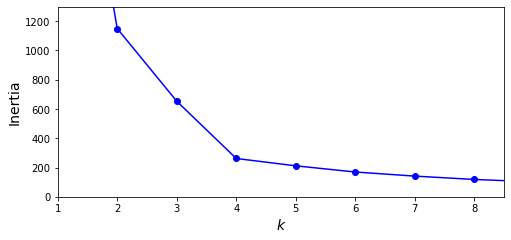

In [51]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [52]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

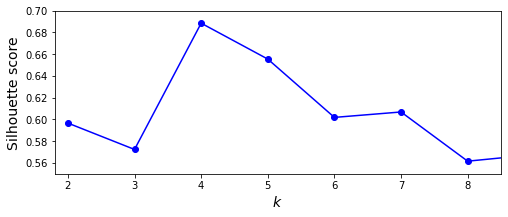

In [53]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [54]:
# 4 clusters seems to be an optimal value for k but 5 also performs well

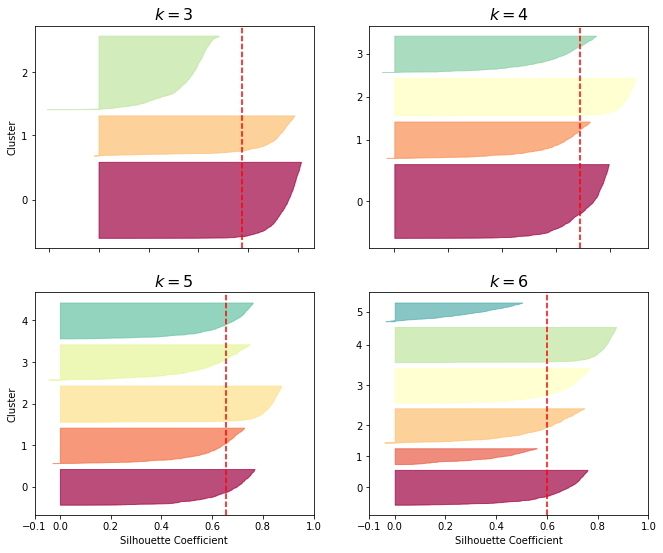

In [59]:
# can also visualise clusters with silhoutte diagram
# a shape's height is the number of instances
# a shape's width is the sorted silhouette coefficients of the instances
# dashed line shows mean silhouette coefficient
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()